## 1. Setting up the Environment

In [2]:
# Import necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st
import statsmodels.api as sm

# Sklearn libraries for logistic regression and evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.distributions.empirical_distribution import ECDF 

# Set plot style for visualisations

sns.set(style="whitegrid")

## 2. Loading the Dataset

In [3]:
# Load the dataset
# The Pima Indians Diabetes dataset contains several medical predictor variables and one target variable (Outcome)
# 'Outcome' is binary: 1 indicates diabetes, 0 indicates no diabetes.

pimadiabetes_df = pd.read_csv('PimaDiabetes.csv')

# Display the first few rows of the dataset

pimadiabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Basic Dataset Information and Descriptive Statistics

In [6]:
# Extract information about the data frame 

print(pimadiabetes_df.info()) 
print(pimadiabetes_df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

## 4. Data Cleaning: Checking for Missing and Duplicate Values

In [8]:
# Check for missing or duplicate values

print("Missing values:\n", pimadiabetes_df.isnull().sum())
print("Duplicate values:", pimadiabetes_df.duplicated().sum())

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Duplicate values: 0


## 5. Exploratory Data Analysis

### 5.1 Boxplots for feature distributions

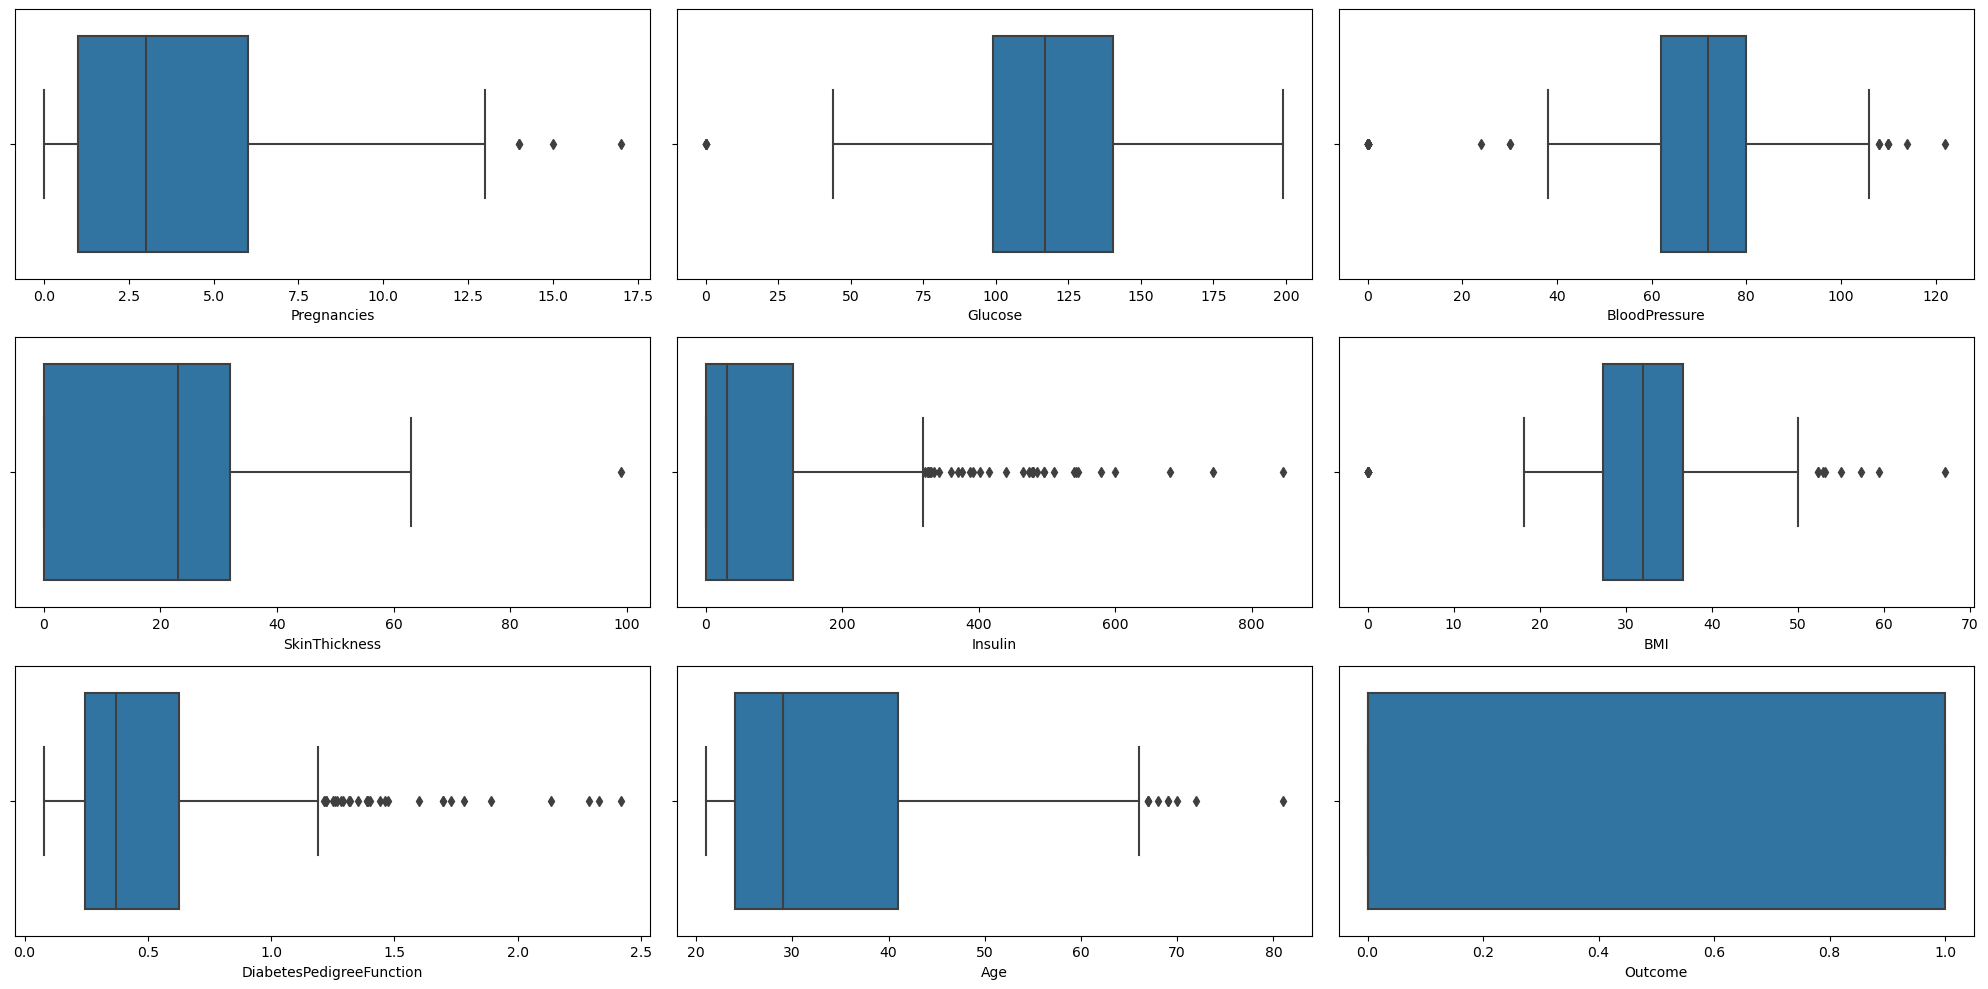

In [15]:
# Plotting boxplots for feature distributions to visualise the spread and detect potential outliers in each feature.

# Create subplots for all
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

# Plot each boxplot
sns.boxplot(ax=axes[0, 0], x=pimadiabetes_df['Pregnancies'])
sns.boxplot(ax=axes[0, 1], x=pimadiabetes_df['Glucose'])
sns.boxplot(ax=axes[0, 2], x=pimadiabetes_df['BloodPressure'])
sns.boxplot(ax=axes[1, 0], x=pimadiabetes_df['SkinThickness'])
sns.boxplot(ax=axes[1, 1], x=pimadiabetes_df['Insulin'])
sns.boxplot(ax=axes[1, 2], x=pimadiabetes_df['BMI'])
sns.boxplot(ax=axes[2, 0], x=pimadiabetes_df['DiabetesPedigreeFunction'])
sns.boxplot(ax=axes[2, 1], x=pimadiabetes_df['Age'])
sns.boxplot(ax=axes[2, 2], x=pimadiabetes_df['Outcome'])

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


### 5.2 Feature Distribution by Diabetes Outcome

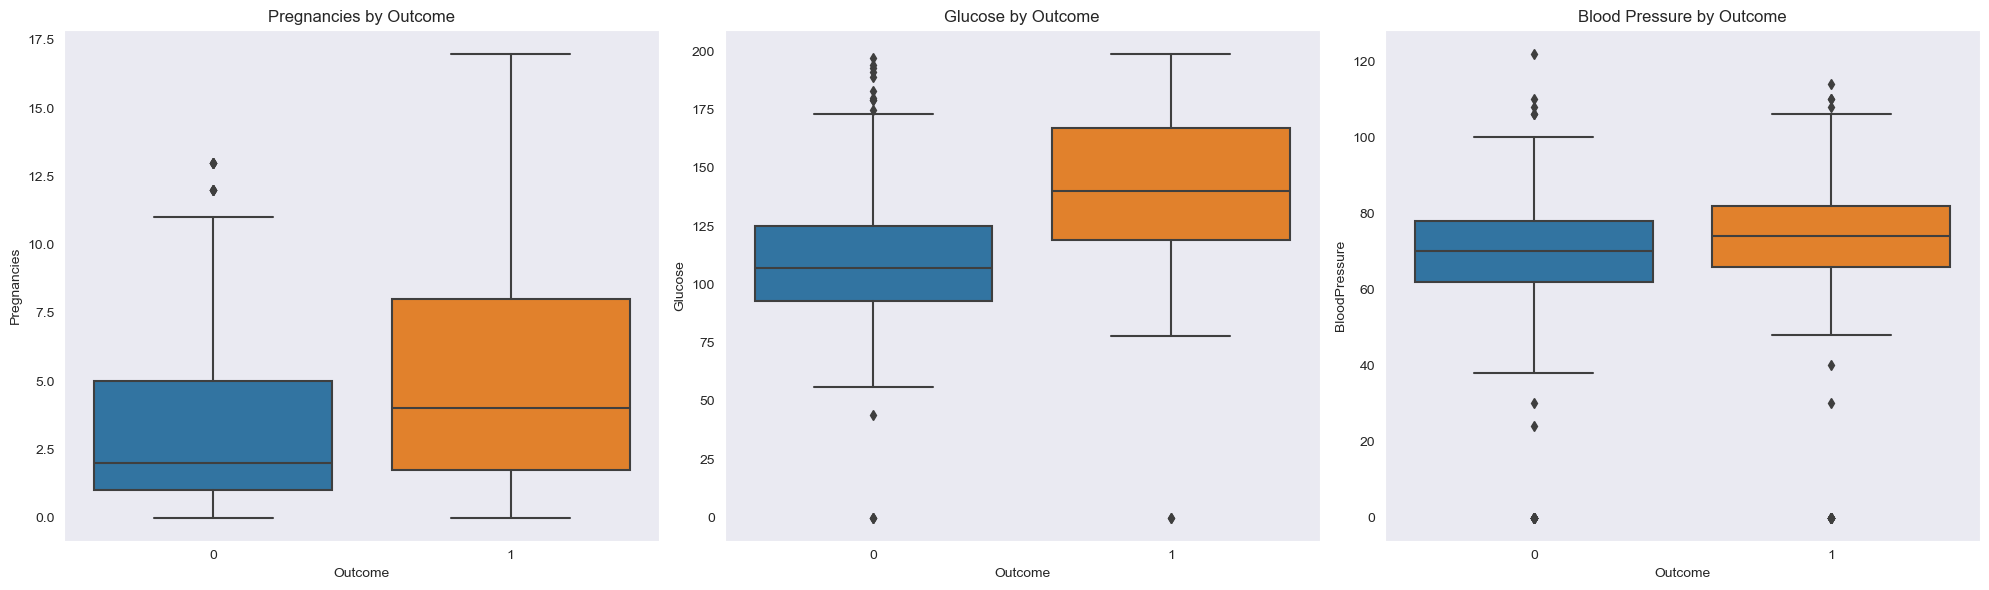

In [55]:
# Distribution of features by diabetes outcome to examine how some key features vary based on the presence (1) or absence (0) of diabetes


plt.figure(figsize=(20, 6))

# Distribution by Pregnancies, Glucose, and Blood Pressure based on Outcome
plt.subplot(1, 3, 1)
sns.boxplot(x=pimadiabetes_df['Outcome'], y=pimadiabetes_df['Pregnancies'])
plt.title('Pregnancies by Outcome')

plt.subplot(1, 3, 2)
sns.boxplot(x=pimadiabetes_df['Outcome'], y=pimadiabetes_df['Glucose'])
plt.title('Glucose by Outcome')

plt.subplot(1, 3, 3)
sns.boxplot(x=pimadiabetes_df['Outcome'], y=pimadiabetes_df['BloodPressure'])
plt.title('Blood Pressure by Outcome')

plt.tight_layout()
plt.show()


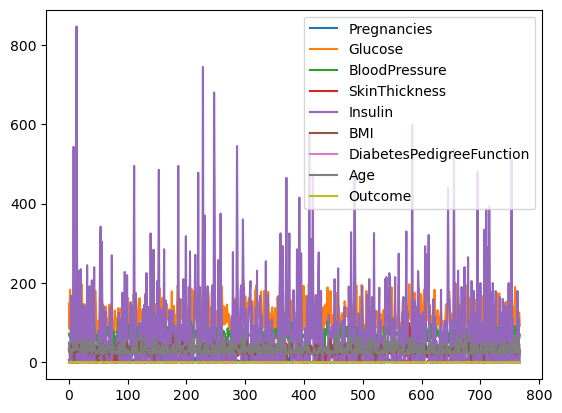

In [17]:
# Visualise the data frame

pimadiabetes_df.plot()
plt.show()

### 5.3 Exploring Correlations 

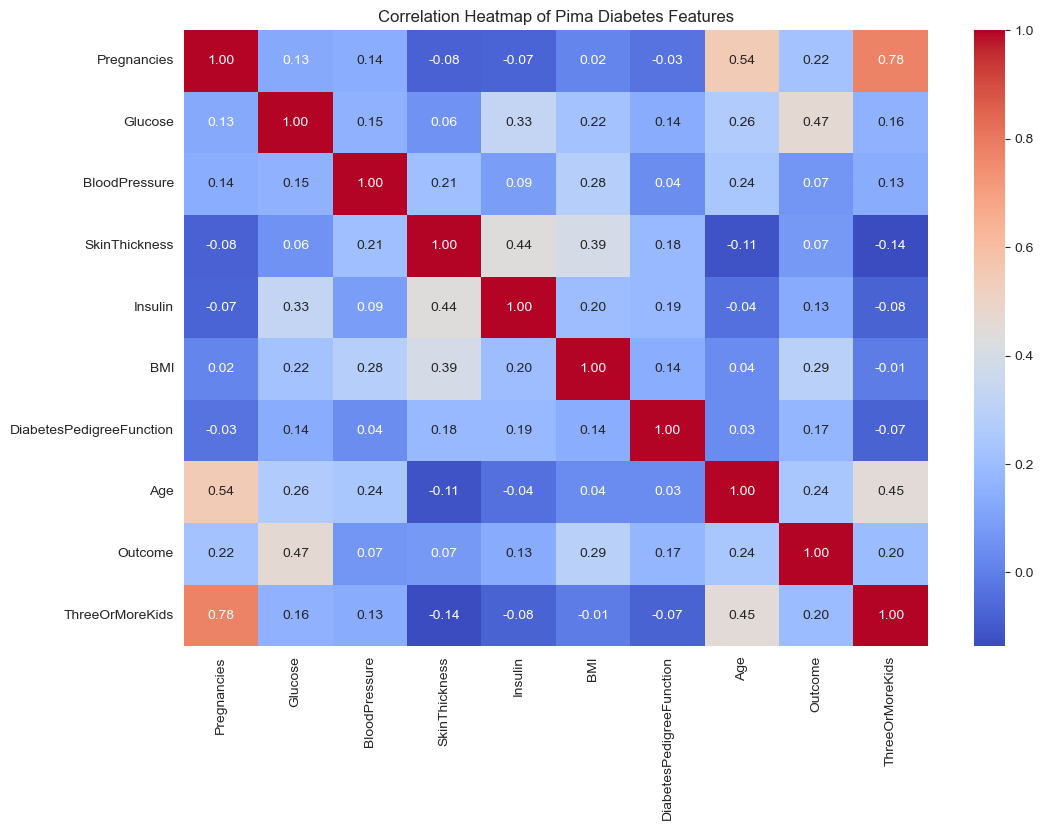

In [57]:
# Plotting a correlation heatmap to visualise the relationships between features and identify potential multicollinearity.

plt.figure(figsize=(12, 8))
sns.heatmap(pimadiabetes_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Pima Diabetes Features')
plt.show()

In [58]:
# Table of correlation coefficients

corr = pimadiabetes_df.corr(method = 'pearson')
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ThreeOrMoreKids
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.777300
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.156010
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.134761
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.135950
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.076724
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,-0.008693
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,-0.074604
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.454156
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.196340
ThreeOrMoreKids,0.777300,0.156010,0.134761,-0.135950,-0.076724,-0.008693,-0.074604,0.454156,0.196340,1.000000


# 6. Probabilistic Regression Analysis

### 6.1 Feature Engineering: Creating New Column "ThreeOrMoreKids"

In [41]:
# Create a new column 'ThreeOrMoreKids' based on the 'Pregnancies' column
pimadiabetes_df['ThreeOrMoreKids'] = (pimadiabetes_df['Pregnancies'] >= 3).astype(int)

# Check the DataFrame to verify the new column
pimadiabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ThreeOrMoreKids
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0


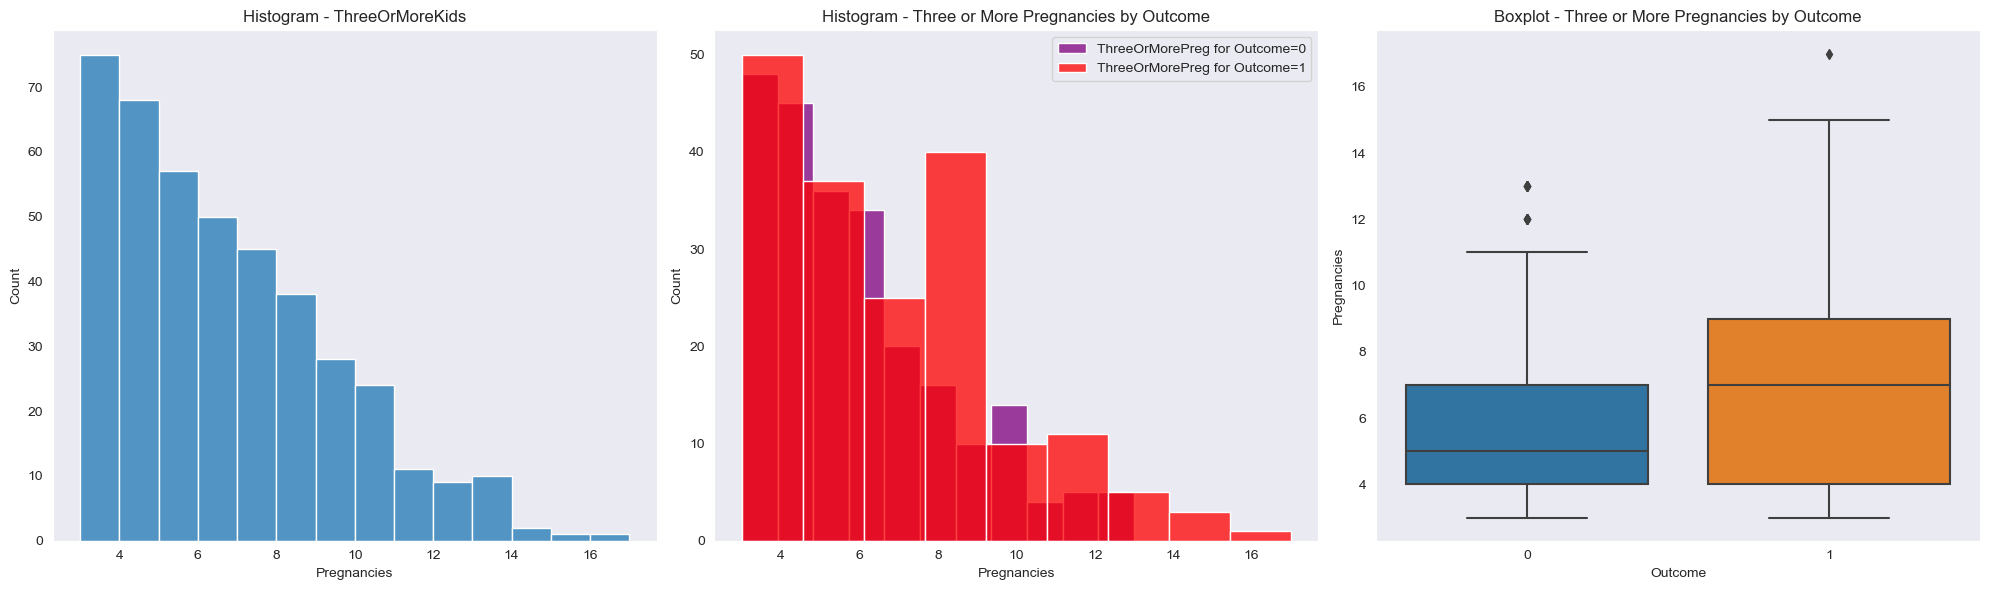

In [42]:
# Filter subset of women with three or more pregnancies 

diab3 = pimadiabetes_df.loc[(pimadiabetes_df['ThreeOrMoreKids'] == 1) & (pimadiabetes_df['Outcome'] == 1)]
nondia3 = pimadiabetes_df.loc[(pimadiabetes_df['ThreeOrMoreKids'] == 1) & (pimadiabetes_df['Outcome'] == 0)]

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.set_style("dark")
plt.title("Histogram - ThreeOrMoreKids")
sns.histplot(pimadiabetes_df[pimadiabetes_df['ThreeOrMoreKids'] == 1]['Pregnancies'], kde=False)

plt.subplot(1, 3, 2)
sns.histplot(nondia3['Pregnancies'], kde=False, color="Purple", label="ThreeOrMorePreg for Outcome=0")
sns.histplot(diab3['Pregnancies'], kde=False, color="Red", label="ThreeOrMorePreg for Outcome=1")
plt.title("Histogram - Three or More Pregnancies by Outcome")
plt.legend()

plt.subplot(1, 3, 3)
sns.boxplot(x=pimadiabetes_df['Outcome'], y=pimadiabetes_df[pimadiabetes_df['ThreeOrMoreKids'] == 1]['Pregnancies'])
plt.title("Boxplot - Three or More Pregnancies by Outcome")

plt.tight_layout()
plt.show()



### 6.2 Model Setup

In [47]:
# Logistic Regression Model
# Define X and y variables, ie, relevant select predictor variables and target variable 

X = pimadiabetes_df[['BMI', 'Glucose', 'DiabetesPedigreeFunction']]  # Selected predictor variables based on empirical relevance 
y = pimadiabetes_df['Outcome']  # Target variable

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialise and train the model
logr_model1 = LogisticRegression(max_iter=1000)
logr_model1.fit(X_train, y_train)

# Predictions
y_pred = logr_model1.predict(X_test)

### 6.3 Model Evaluation

In [59]:
# Model Evaluation

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy of Logistic Regression Model: 0.7445887445887446
Confusion Matrix:
 [[127  24]
 [ 35  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       151
           1       0.65      0.56      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



### 6.4 Probability Testing

In [61]:
# Predicting the probability of diabetes for 'ThreeOrMoreKids'
X_kids = pimadiabetes_df[['ThreeOrMoreKids']]
logr_model_kids = LogisticRegression(max_iter=1000)
logr_model_kids.fit(X_kids, y)

prob_two_or_fewer = logr_model_kids.predict_proba([[0]])[0][1]
prob_three_or_more = logr_model_kids.predict_proba([[1]])[0][1]

print("Probability of diabetes with two or fewer children:", prob_two_or_fewer)
print("Probability of diabetes with three or more children:", prob_three_or_more)

Probability of diabetes with two or fewer children: 0.24880446633215458
Probability of diabetes with three or more children: 0.4323802982539302


/Users/tko/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/tko/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
